In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [3]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Проверяем формат столбцов

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'])

# Выводим первые строки и типы данных
print(df.head())
print(df.dtypes)

        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2
Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [5]:
sales_by_date = df.groupby('Дата')['Количество'].sum().reset_index(name='Количество продаж')

#  результат
print(sales_by_date)

          Дата  Количество продаж
0   2018-01-04               3734
1   2018-01-05               3643
2   2018-01-06               3193
3   2018-01-07               3298
4   2018-01-09               4055
..         ...                ...
200 2018-08-26               5302
201 2018-08-28               5983
202 2018-08-29               4969
203 2018-08-30               4648
204 2018-08-31               4570

[205 rows x 2 columns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index(name='Количество продаж')

# Выводим первые 5 строк
print(grouped_df.head())

        Дата  Количество продаж
0 2018-01-04               3734
1 2018-01-05               3643
2 2018-01-06               3193
3 2018-01-07               3298
4 2018-01-09               4055


Вывести несколько первых строк сгруппированных данных

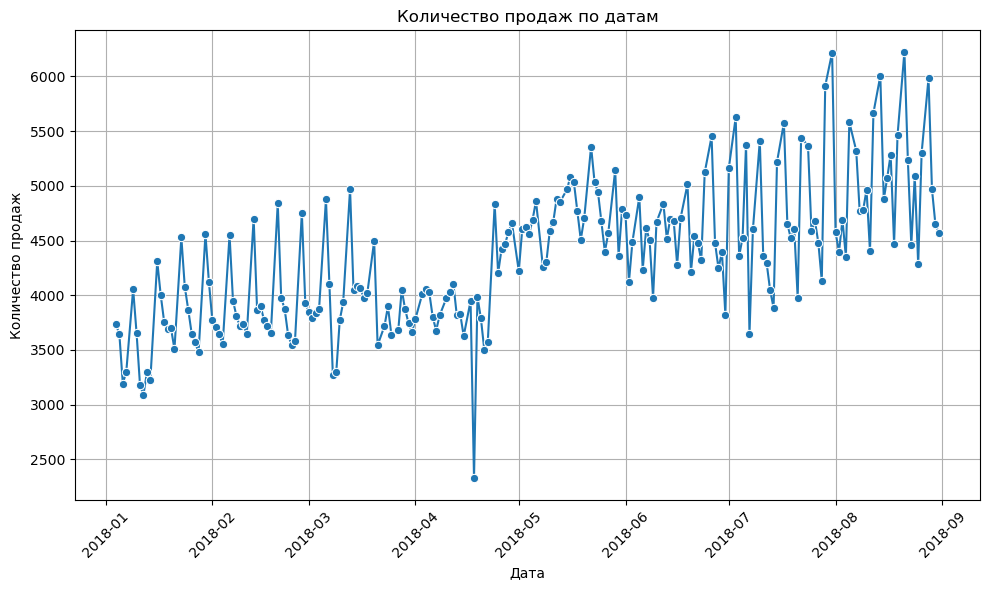

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Дата', y='Количество продаж', data=grouped_df, marker='o')
plt.title('Количество продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Нарисуйте график продаж у `grouped_df`

In [8]:
Тип графика: Линейный график с точками
В начале (январь 2018) продажи находятся на уровне около 3500–4000 единиц.
С февраля по апрель 2018 года наблюдается волнообразный рост с пиками около 4500–5000 единиц и небольшими спадами.
В мае 2018 года происходит резкий спад до минимума около 2500 единиц, что является самым низким значением на графике.
С июня по сентябрь 2018 года продажи снова растут, с колебаниями между 4000 и 6000 единиц. Наиболее значительный пик достигается в августе или сентябре, где значения подходят к 6000.
Общая тенденция после мая показывает восстановление и рост продаж с некоторыми колебаниями.
Колебания: График демонстрирует высокую волатильность — значительные скачки и падения между соседними месяцами, что может указывать на сезонные факторы или другие влияния на продажи.
График показывает, что продажи в 2018 году подвержены значительным колебаниям, с заметным провалом в мае и последующим восстановлением. Высокий пик в конце периода (август–сентябрь) может быть связан с сезонным спросом (например, предпраздничные продажи)

SyntaxError: invalid syntax (2785393277.py, line 1)

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [10]:
# Находим квартили и IQR для столбца Количество
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы 
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)].copy()


if not outliers.empty:
    # Добавляем столбец Отклонение с помощью .loc
    outliers.loc[:, 'Отклонение'] = np.where(outliers['Количество'] > upper_bound,
                                             outliers['Количество'] - upper_bound,
                                             lower_bound - outliers['Количество'])
    # Находим строку с максимальным отклонением
    max_outlier_row = outliers.loc[outliers['Отклонение'].idxmax()]
    
    print("Строка с максимальным выбросом по количеству продаж:")
    print(max_outlier_row)
else:
    print("Выбросов по количеству продаж не найдено.")

Строка с максимальным выбросом по количеству продаж:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Отклонение                    191.5
Name: 218822, dtype: object


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [11]:
filtered_df = df[(df['Склад'] == 3) & 
                 (df['Дата'].dt.month.isin([6, 7, 8])) & 
                 (df['Дата'].dt.year == 2018) & 
                 (df['Дата'].dt.weekday == 2)]

# Группируем по номенклатуре и суммируем продажи
sales_by_product = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()

# Находим топовый товар (максимальная сумма продаж)
top_product = sales_by_product.loc[sales_by_product['Количество'].idxmax()]

print("Топовый товар по продажам по средам за июнь–август 2018 на 3-м складе:")
print(top_product)

Топовый товар по продажам по средам за июнь–август 2018 на 3-м складе:
Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [15]:
print(weather_data.columns.tolist())


['#']


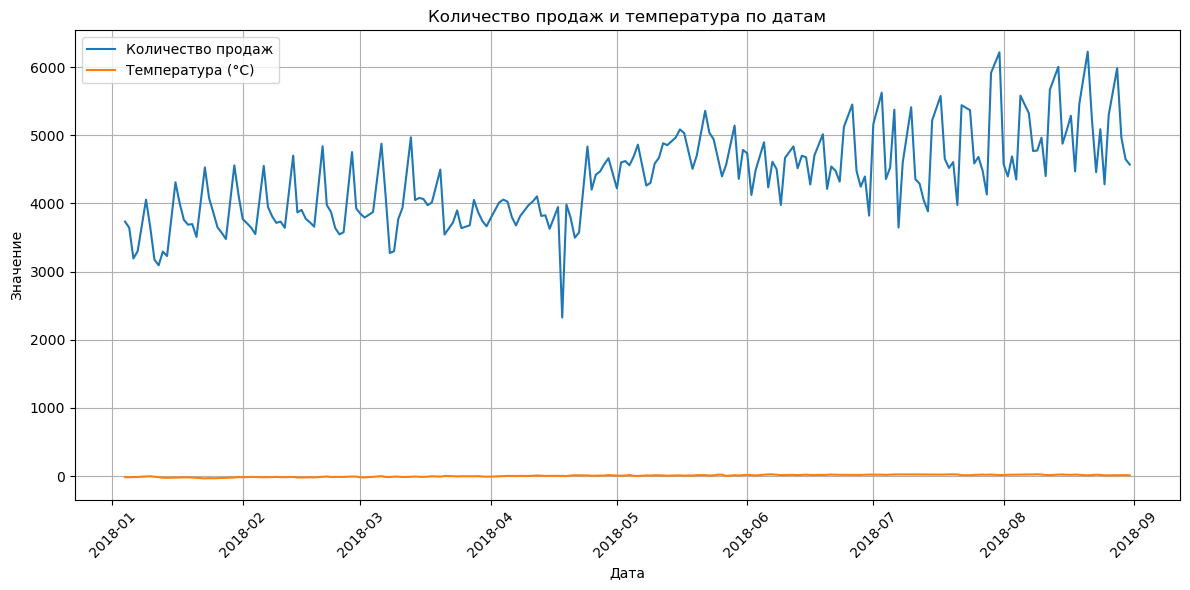

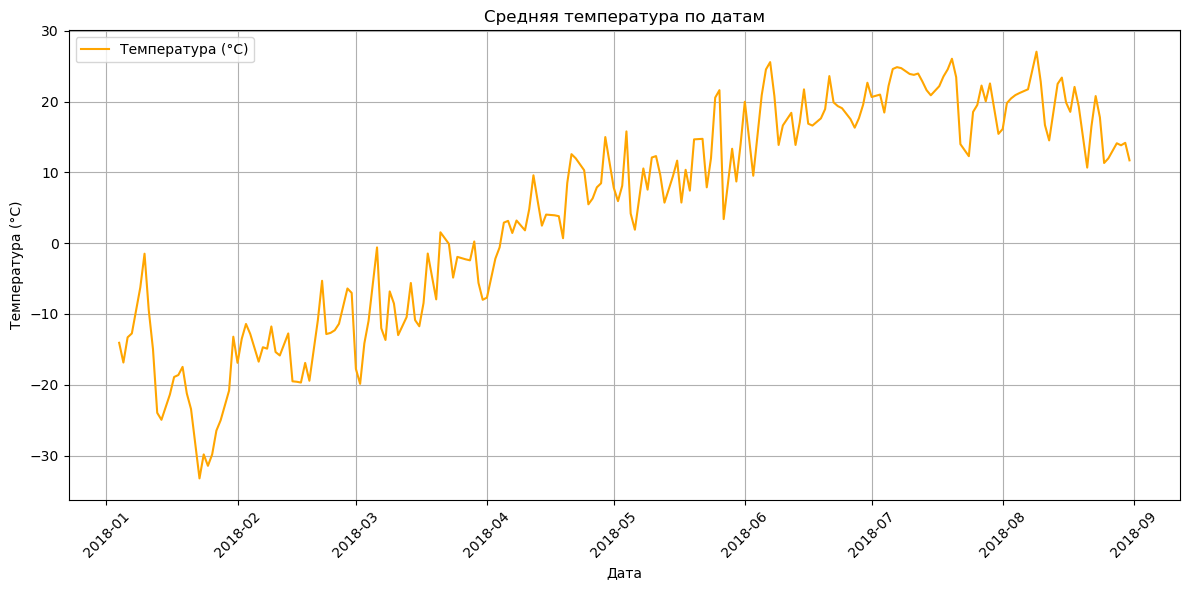

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка и обработка данных продаж
df = pd.read_csv('data.csv')
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index(name='Количество продаж')

#  Загрузка и обработка погодных данных
weather_data = pd.read_csv(
    '35188.01.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.csv',
    delimiter=';',
    skiprows=11,
    header=None,  # Первая строка — не заголовок
    encoding='utf-8',
    engine='python',
    on_bad_lines='skip'
)

# Оставляем только нужные столбцы: 0 — дата, 1 — температура
weather_data = weather_data[[0, 1]]
weather_data.columns = ['Местное время в Астане', 'T']

# Преобразуем типы данных
weather_data['Местное время в Астане'] = pd.to_datetime(weather_data['Местное время в Астане'], format='%d.%m.%Y %H:%M', errors='coerce')
weather_data['T'] = pd.to_numeric(weather_data['T'], errors='coerce')

# Удалим строки с пропущенными значениями
weather_data = weather_data.dropna(subset=['Местное время в Астане', 'T'])

# Добавим столбец "Дата" без времени
weather_data['Дата'] = weather_data['Местное время в Астане'].dt.date

# Группировка по дате, расчёт средней температуры
daily_weather = weather_data.groupby('Дата')['T'].mean().reset_index()
daily_weather['Дата'] = pd.to_datetime(daily_weather['Дата'])

#  Объединение с продажами 
merged_df = pd.merge(grouped_df, daily_weather, on='Дата', how='left')

#  Построение графиков 

# График 1 Продажи и температура
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Дата', y='Количество продаж', label='Количество продаж')
sns.lineplot(data=merged_df, x='Дата', y='T', label='Температура (°C)')
plt.title('Количество продаж и температура по датам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# График 2: Только температура
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Дата', y='T', label='Температура (°C)', color='orange')
plt.title('Средняя температура по датам')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
